# Lecture 9: Randomness Part I
<br><br>
## Last time
more slicing of numpy arrays, messing around with images of shape `(M, N, 3)`, histograms. 

### Today
* review on histogram
* Randomness and scattered plot

As always:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lambda function in Python
Recall in reviewing eigenvalues in Linear algebra, we want to avoid using lambda? This is because lambda has a special use in Python. It can be used to define a *function handle* or *anonymous function*, similar to `@` used in Matlab (`y = @(x) x^2 + 1`).

In [4]:
# how to define a function
def myfunc(x):
    return x**2 + 1

myfunc(np.arange(5))

array([ 1,  2,  5, 10, 17], dtype=int32)

In [5]:
y = lambda x: x**2 + 1 # avoid using lambda in ordinary programming in Python

In [7]:
type(myfunc)

function

In [8]:
type(y)

function

In [10]:
# this can be applied to ndarray as well
y(np.arange(10))

array([ 1,  2,  5, 10, 17, 26, 37, 50, 65, 82], dtype=int32)

In [12]:
y(1.2*np.ones((3,3))) # x**2 + 1 is applied on every entry of this ndarray

array([[2.44, 2.44, 2.44],
       [2.44, 2.44, 2.44],
       [2.44, 2.44, 2.44]])

# Randomness

Randomness is used a lot both in mathematics and the real world.

Generally, a random number comes from a probability distribution. 

The distribution might be discrete: i.e., 
it comes from a set 

$$ \big\{ (x_1, p_1), ..., (x_n, p_n) \big\},$$

where you get outcome $x_i$ with probability $p_i$, i.e., 

$$P(X = x_i) = p_i.$$


It is assumed that $\sum_i p_i = 1$ (if not you can normalize the $p$'s so their sum is 1). The function that takes $x_i \mapsto p_i$ is called the *probability mass function*.

For continuous random numbers, one normally uses a *probability density function* (pdf). For example, the normal distribution comes from the following function: $\mathcal{N}(\mu, \sigma^2) $

$$p(x; \mu,\sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu )^2}{2\sigma^2} },$$

where $\mu$ and $\sigma$ are parameters (mean and standard deviation).

The probability of a random number from this distribution being in the interval $[a,b]$ is then:

$$P\big(X\in [a,b]\big) = \int_a^b p(x)\,dx$$

The most well-known distributions are the uniform distribution (where pdf is a constant) and the normal distribution. 

## Remark:

 The histogram is an estimate of the (probability) density distribution of a (continuous) variable.

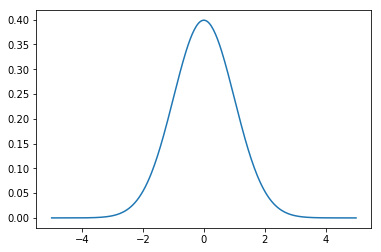

In [13]:
# let's graph the density function of the normal distribution.
from math import pi, sqrt, e
X = np.linspace(-5,5,300)
pdf = lambda x: 1/sqrt(2*pi)*e**(-0.5*x*x) # pdf for N(0,1) standard normal dist
Y = pdf(X)
plt.plot(X, Y)

## Uniform distribution

The easiest distribution is the uniform distribution (all numbers in a given range are equally likely).

In python it's the function `random.random()` that will produce a random number in $(0,1)$.

In [58]:
import random # random module
random.seed(42)
# the seed will initialize the random number generator
# fixing the seed will fix the "random" number generated
for i in range(5):
    r = random.random()
    print(r)

0.6394267984578837
0.025010755222666936
0.27502931836911926
0.22321073814882275
0.7364712141640124


In [17]:
import random # random module
# random.seed(42)
# the seed will initialize the random number generator
# fixing the seed will fix the "random" number generated
for i in range(5):
    r = random.random()
    print(r)

0.21863797480360336
0.5053552881033624
0.026535969683863625
0.1988376506866485
0.6498844377795232


## Reading material
How would we turn this uniform random number from $(0,1)$ into random numbers from $a$ to $b$?

In [60]:
def rnum(a,b):
    return a + (b-a)*random.random()

for i in range(5):
    print(rnum(-3,6))

-1.0322582267675697
1.5481975929302614
-2.761176272845227
-1.2104611438201636
2.8489599400157086


## numpy.random
You can do random arrays in numpy, which uses the submodule `random` in `numpy`


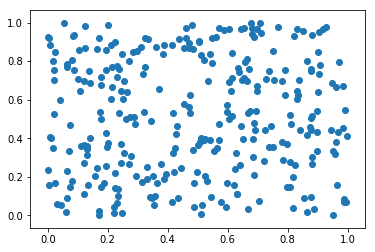

In [61]:
N = 300
np.random.uniform()
X = np.random.uniform(0,1,N) # this syntax is okay as well
Y = np.random.uniform(low=0,high=1,size=N)
plt.scatter(X,Y)
plt.scatter()

### Adding scattered noise to a linear function

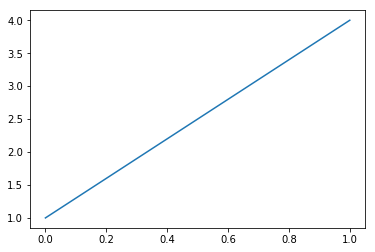

In [63]:
X = np.linspace(0,1,100)
Y = 3 * X + 1
plt.plot(X,Y)

In [68]:
 X.shape

(100,)

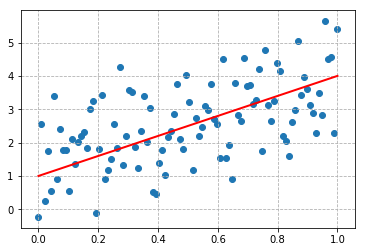

In [66]:
# let's add some noise
Z = 3 * X + 1 + np.random.normal(loc=0,scale=1, size= X.shape[0])
# np.random.normal(0,1, X.shape[0]) same output 
# loc is mean
# scale is standard dev
# size is the number of samples we draw in this distribution
# we'll see much more about randomness later
plt.scatter(X,Z)  # we use a scatter plot
plt.plot(X,Y, color = "red", linewidth= 2.0)
plt.grid(True, linestyle = 'dashed')

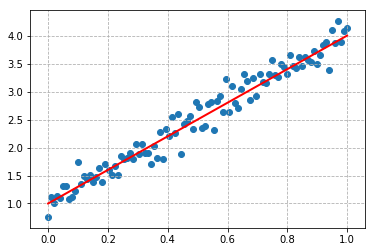

In [67]:
# let's add some noise
Z = 3 * X + 1 + np.random.normal(loc=0,scale=0.2, size= X.shape[0])     
# we'll see much more about randomness later
plt.scatter(X,Z)  # we use a scatter plot
plt.plot(X,Y, color = "red", linewidth= 2.0)
plt.grid(True, linestyle = 'dashed')

## In-class exercise:
Write a function `rand_linear`, takes input of the slope `m` and `b`, the strength of the normal random noise (mean 0 and standard deviation `sigma`), and a numpy array `x`, returns the function values of the linear function $y = mx + b$ with a random noise.

In [ ]:
# code here

### Getting random integers:

In [70]:
# random.randint()
# simulate a die rolling sequence
N = 2000
X = np.zeros(N)
for i in range(N):
    X[i] = random.randint(1, 6)   # from 1 to 6 inclusive

In [71]:
X[:10] # first 10 elements of X

array([5., 4., 2., 4., 5., 3., 1., 2., 6., 4.])

In [72]:
print(np.mean(X))

3.5475


### Sampling from the normal distribution

In [ ]:
N = 50
X = np.zeros(N)
mu = 0.0
sigma = 1.0
for i in range(N):
    X[i] = random.gauss(mu, sigma)

plt.scatter(X, np.zeros(N) + 0.5)

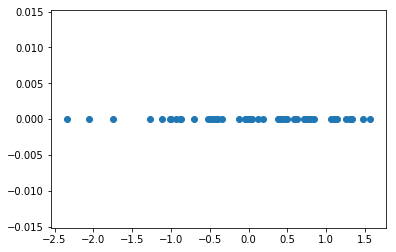

In [74]:
# numpy version:

N = 50 # no. of samples
mu = 0.0
sigma = 1.0
X = np.random.normal(loc=mu, scale=sigma, size=N)
plt.scatter(X, np.zeros(N))

Looks like it's more concentrated around zero. How can we see it better? Histogram.

In [ ]:
N = 500000 # no of samples
mu = 0.0
sigma = 1.0
X = np.random.normal(loc=mu, scale=sigma, size=N)
plt.axis([-6, 6, 0, 0.45]) # fix our axes view
plt.hist(X,  bins=10,  density=True)
# plt.hist()
# bin size = (total sample)/(no. of bins)
plt.grid(True, linestyle = 'dashed')
plt.show()

## in-class exercise:
Change the `sigma` and the `bins` (no. of bins), see what happens.

If `sigma` is smaller, it is more concentrated toward the mean, if `sigma` is bigger, it is more spread out.

Sigma is the standard deviation, which measures how wide the normal distribution is. For example:

In [ ]:
N = 500000
mu = 0.0
sigma = 2.0  # highers standard dev
X = np.random.normal(loc=mu, scale=sigma, size=N)
plt.axis([-6, 6, 0, 0.45])
plt.hist(X, 50, density=True)
plt.grid(True, linestyle = 'dashed')
plt.show()

# looks the same but look at the numbers above and below

You can compute the mean and standard deviation of any data:

In [ ]:
np.mean(X)

In [ ]:
np.std(X)

In general, if X is my data-set, then the normal distribution with `mu = np.mean(X)`, and `sigma = np.std(X)` will fit the data best.

If a data distribution normal then **about 68 percent of the data values are within one standard deviation of the mean**.
<br><br>
Reference: [68–95–99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

Histogram of uniform distribution. 

In [ ]:
N = 50000
X = np.random.uniform(low=0, high=1, size=N)
plt.hist(X, 50)

plt.grid(True, linestyle = 'dashed')
plt.show()